In [2]:
import os
from langchain_cloudflare import ChatCloudflareWorkersAI

# Configuration
# (Ensure these variables are set, or replace with your actual keys)
ACCOUNT_ID = "8a0e86936ffdb69b5d71eb42c4873a33"
API_TOKEN = "z9NPe81vZqqfohfpH0Tb1rmgE1Ap3xPSe2Y11h3Z"
MODEL_ID = "@cf/meta/llama-4-scout-17b-16e-instruct"

# Initialize the LangChain Chat Model
llm = ChatCloudflareWorkersAI(
    account_id=ACCOUNT_ID,
    api_token=API_TOKEN,
    model=MODEL_ID
)

print("LangChain Cloudflare model initialized.")

LangChain Cloudflare model initialized.


In [3]:
import base64

def encode_image_to_data_uri(file_path):
    """Encodes a local image file to a Base64 Data URI."""
    mime_type = "image/jpeg"
    if file_path.lower().endswith('.png'):
        mime_type = "image/png"
    elif file_path.lower().endswith('.webp'):
        mime_type = "image/webp"
        
    with open(file_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
        
    return f"data:{mime_type};base64,{encoded_string}"

print("Image helper defined.")

Image helper defined.


In [6]:
from langchain_core.messages import HumanMessage
from IPython.display import Image, display

def run_langchain_ocr(image_path):
    # 1. Display image
    display(Image(filename=image_path, width=300))
    
    # 2. Prepare Data URI
    image_data = encode_image_to_data_uri(image_path)
    
    # 3. Create a Multimodal Message
    # LangChain expects a list of content blocks for multimodal inputs
    message = HumanMessage(
        content=[
            {
                "type": "text", 
                "text": "Transcribe the math in this image into LaTeX format. Output ONLY the raw LaTeX strings. Do not use Markdown formatting, do not explain the steps, and do not include headers like 'Step 1'."
            },
            {
                "type": "image_url", 
                "image_url": {"url": image_data}
            }
        ]
    )
    
    # 4. Invoke the model directly
    try:
        response = llm.invoke([message])
        return response.content
    except Exception as e:
        return f"Error: {e}"

# Run it
# result = run_langchain_ocr("test_image.jpg")
# print(result)

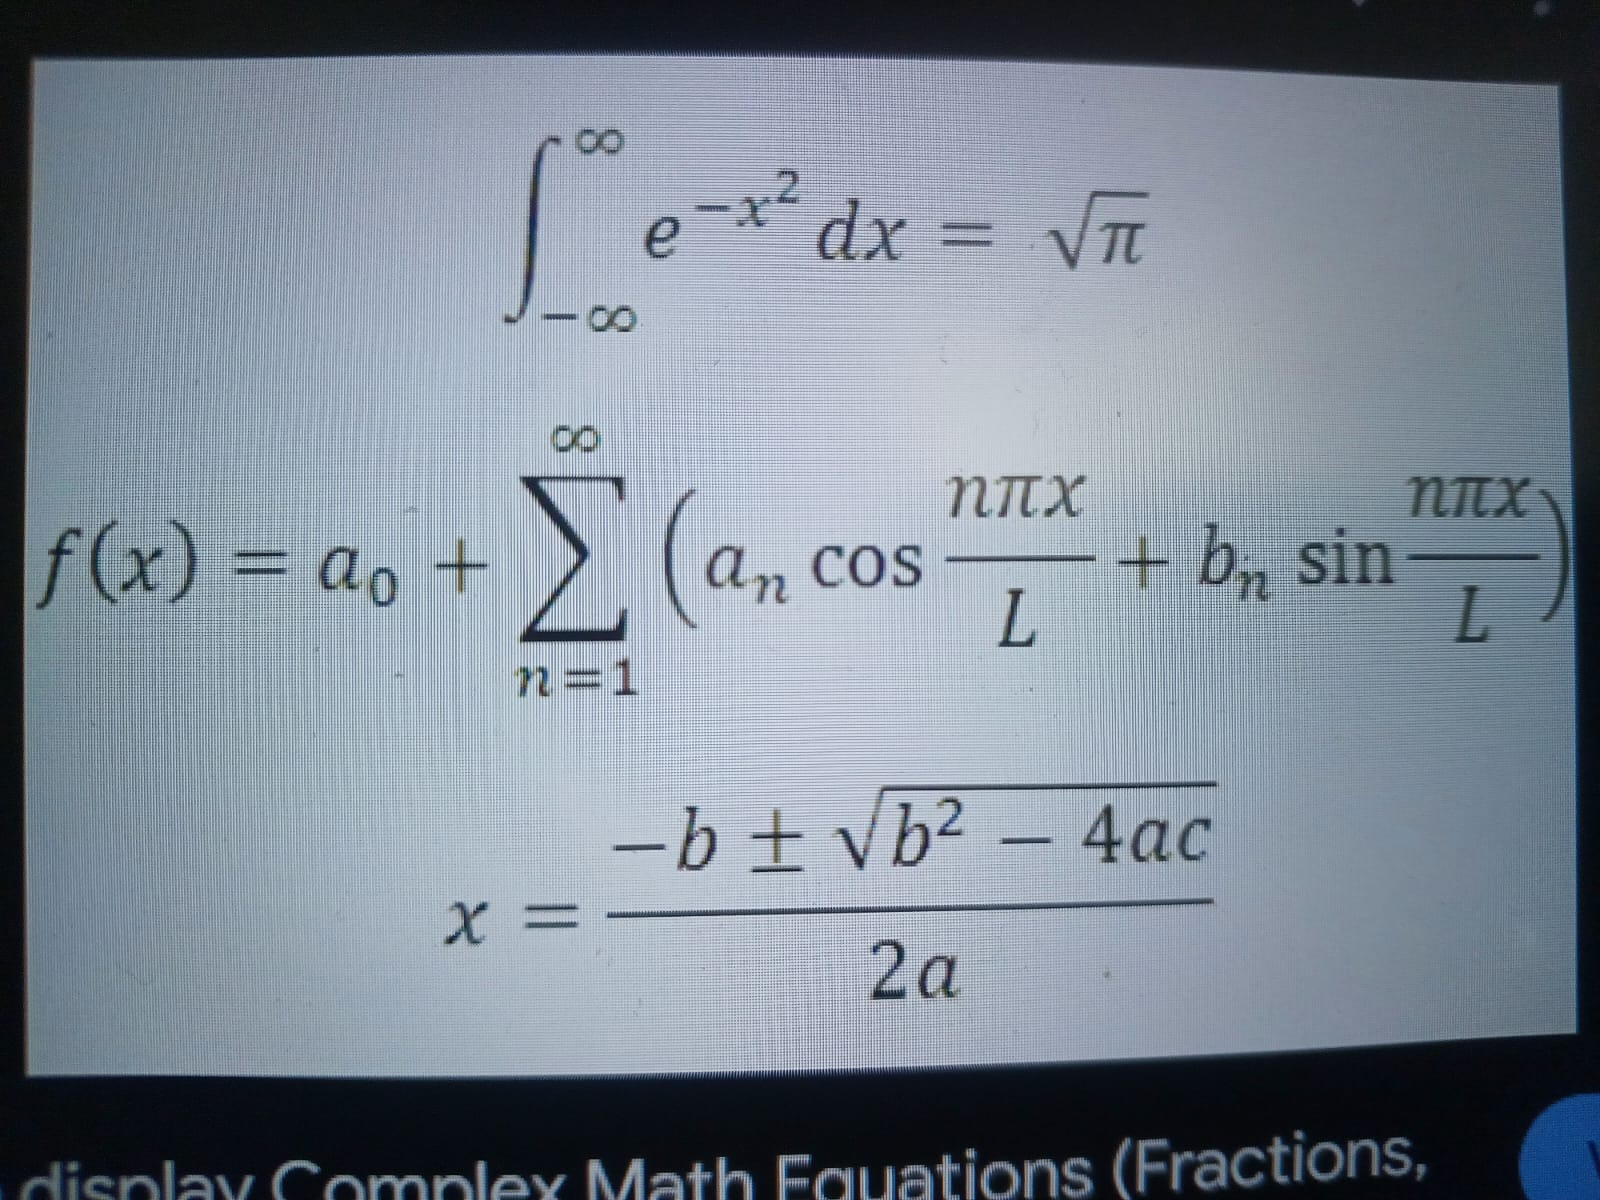

\int_{-\infty}^{\infty} e^{-x^2} dx = \sqrt{\pi}

f(x) = a_0 + \sum_{n=1}^{\infty} \left( a_n \cos \frac{n \pi x}{L} + b_n \sin \frac{n \pi x}{L} \right)

x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}


In [11]:
result = run_langchain_ocr("test_images/jpeg_format.jpeg")
print(result)